In [1]:
import pandas as pd
import numpy as np

**Exercise 1**: 

(a) Reduce the "ZIP-code"-dataset to two dimensions using Oja’s algorithm and plot thepoint cloud of the data set highlighting each class.

(b) Try one of the previously implemented classifiers (k-NN or Logistic Regression) on thetwo-dimensional dataset.

In [2]:
#train = pd.read_csv('/Users/Eva/Downloads/zip.train', header=None, sep=' ')
#train.drop(257,axis=1,inplace=True)
#test = pd.read_csv('/Users/Eva/Downloads/zip.test', header=None, sep=' ')

train = pd.read_csv('zip.train', header=None, sep=' ')
train.drop(257,axis=1,inplace=True)
test = pd.read_csv('zip.test', header=None, sep=' ')


**Oja's algorithm**

In [100]:
X_features = train.iloc[:,1:]

X_new = X_features-np.mean(X_features, axis=0).values # VB: i don't know if this is correct
gamma = 1
# initalize w: 
w = np.random.uniform(size=(X_new.shape[1]))
loop_counter = 0
indeces = 
while X_new.shape[0] > 0:
    loop_counter += 1
    random_index = np.random.randint(X_new.shape[0])
    x = np.array(X_new.iloc[random_index])
    #X_new = X_new.drop(X_new.index[random_index])
    w = w + (gamma*w)*x*(x-(w*x)*w)
    w = w / np.linalg.norm(w)
    gamma = 1/loop_counter
    X_new = X_new - (w*X_new)*w
    
    if loop_counter >= 5000:
        print(X_new)
        break
        
    # question: how do we use this to get rid of dimensions?

           1         2         3         4         5             6    \
0    -0.003555 -0.014222 -0.048793 -0.110999 -0.001096 -4.715563e-09   
1    -0.003555 -0.014222 -0.048793  0.073896  0.000496 -2.404354e-09   
2    -0.003555 -0.014222 -0.048793 -0.110999 -0.001096 -4.715563e-09   
3    -0.003555 -0.014222 -0.048793 -0.110999 -0.001096  4.081552e-09   
4    -0.003555 -0.014222 -0.048793 -0.110999 -0.001096 -3.844322e-09   
...        ...       ...       ...       ...       ...           ...   
7286 -0.003555 -0.014222 -0.048793 -0.099134  0.001192  4.868089e-09   
7287 -0.003555 -0.014222 -0.048793 -0.101111  0.007166  1.412503e-08   
7288 -0.003555 -0.014222 -0.048793  0.103559 -0.001018 -2.622164e-09   
7289 -0.003555 -0.014222 -0.048793 -0.110999 -0.001096  7.417944e-10   
7290 -0.003555 -0.014222 -0.048793 -0.110999 -0.001096  6.078146e-09   

               7             8         9             10   ...           247  \
0    -4.110042e-09 -1.449505e-13  0.000324  2.211973e-24

In [101]:
np.unique(X_new.iloc[:,255])

array([-5.31506450e-03, -4.31640108e-03, -2.31907425e-03, -1.32041083e-03,
       -3.21747410e-04,  6.76916008e-04,  1.67557943e-03,  2.67424284e-03,
        5.67023310e-03,  9.66488677e-03,  1.06635502e-02,  1.36595404e-02,
        1.56568673e-02,  1.66555307e-02,  1.76541941e-02,  2.06501844e-02,
        3.36328088e-02,  3.76274625e-02,  4.06234527e-02,  4.46181064e-02,
        4.86127601e-02,  5.85993943e-02,  5.95980577e-02,  6.05967211e-02,
        6.35927114e-02,  6.75873650e-02,  7.25806821e-02,  7.45780090e-02,
        7.65753358e-02,  7.75739992e-02,  8.65619700e-02,  1.00543258e-01,
        1.05536575e-01,  1.14524546e-01,  1.21515190e-01,  1.33499151e-01,
        1.36495141e-01,  1.37493804e-01,  1.38492468e-01,  1.40489795e-01,
        1.42487121e-01,  1.48479102e-01,  1.63459053e-01,  1.73445687e-01,
        1.78439004e-01,  1.80436331e-01,  1.85429648e-01,  1.93418956e-01,
        1.94417619e-01,  2.03405590e-01,  2.04404253e-01,  2.25376185e-01,
        2.52340097e-01,  

In [3]:
class oja_pca:
    
    def __init__(self, eps=1e-8, max_iter=1000, random_state=7):
        self.eps = eps
        self.lr = None
        self.max_iter = max_iter
        self.random_state = random_state
        self.w = None
        
    def oja(self, X):
        # initialise vector w
        #np.random.seed(self.random_state)
        #self.w = np.random.uniform(size=(X.shape[1], 1))
        self.w = self.w / np.linalg.norm(self.w, ord=2)
        # initialise learning rate as lr(t)=1/t where t is the number of iterations
        self.lr = 1
        for i in range(1,self.max_iter):
            # update w
            w_last = self.w
            a = self.w.T.dot(X.T)
            self.w = (self.lr*a.dot(X - a.T.dot(self.w.T))).T.shape
            # normalize w
            self.w = self.w / np.linalg.norm(self.w, ord=2)
            # decrease learning rate
            self.lr = 1/i
            
            # check epsilon threshold
            if np.linalg.norm(w_last - self.w) < self.eps:
                break
                
        return self.w
    
    def pca(self, X, num_pc):
        # create output pca matrix
        X_pca = np.zeros((X.shape[0], num_pc))
        # center the data
        centered_X = X-np.mean(X, axis=0).values
        #centered_X_self = centered_X.T.dot(centered_X)
        X_new = centered_X
        # initialise vector w
        #np.random.seed(self.random_state)
        #self.w = np.random.uniform(size=(X.shape[1], 1))
        for d in range(num_pc):
            v = self.oja(centered_X)
            PC = centered_X.dot(v)
            X_new = X_new - PC.dot(v.T)
            centered_X_self = X_new.T.dot(X_new)
            X_pca[:, d] = PC.flatten()
        return X_pca

In [4]:
OJA = oja_pca()

In [5]:
X_features = train.iloc[:,1:]

In [6]:
X_features_2PCs = OJA.pca(X_features, 2)

ValueError: shapes (2,) and (256,7291) not aligned: 2 (dim 0) != 256 (dim 0)

**Exercise 2**: 

Use your implementation of PCA on the greyscale-version of the "LFWcrop Face"-Dataset1.Visualize the first two principal components as Eigenfaces.

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7
image_height: 50
image_width: 37
(5,)


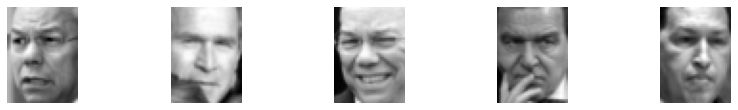

In [10]:
from sklearn.datasets import fetch_lfw_people
import numpy as np
from matplotlib import pyplot as plt


# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)
print("image_height: %d" % h)
print("image_width: %d" % w)


def show_faces(X):
    num_samples = 5
    indices = np.random.choice(range(len(X)), num_samples)
    print(indices.shape)
    sample_digits = X[indices]

    fig = plt.figure(figsize=(20, 6))

    for i in range(num_samples):
        ax = plt.subplot(3, 7.5, i + 1)
        img = sample_digits[i].reshape((h, w))
        plt.imshow(img, cmap='gray')
        plt.axis('off')
show_faces(X)